In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
# Declare each array as a variable to access later.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Unpack lat_lngs zip object into a list, i.e. add the latitudes and longitudes to a list. 
# You can only unzip a zipped tuple once before it is removed from the computer's memory. 
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
# citipy module finds nearest city to lat and long pr w/pop >= 500. 
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
# units=Imperial
# weather_api_key variable calls my api key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list. 
# numerate() method is alternative way to iterate through the list 
# of cities and retrieve both the index and the city from the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    # modulus i % 50 gives yields remainder of i/50.
    # if statement is true then the set_count and the record_count are incremented by 1
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    # Remove blank spaces in the city name and concatenating the city name with city.replace(" ","+")
    # in order to find the corresponding weather data for city instead of for first part of city name.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    # Print the record count and set count and city that is being processed.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | pangnirtung
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | vanavara
Processing Record 5 of Set 1 | tessalit
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | constitucion
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 10 of Set 1 | saskylakh
Processing Record 11 of Set 1 | pacific grove
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | miandrivazo
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | saldanha
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | ayan
Processing Record 21 of Set 1 | tabas
Processing Record 22 of Set 1 | kapaa
Processing Record 23 of Set 1 | vaitupu
City not found. Skipping.

Processing Record 41 of Set 4 | chupa
Processing Record 42 of Set 4 | tavricheskoye
Processing Record 43 of Set 4 | port alfred
Processing Record 44 of Set 4 | sur
Processing Record 45 of Set 4 | abnub
Processing Record 46 of Set 4 | puerto ayora
Processing Record 47 of Set 4 | praxedis guerrero
Processing Record 48 of Set 4 | el faiyum
City not found. Skipping...
Processing Record 49 of Set 4 | faanui
Processing Record 50 of Set 4 | pitimbu
Processing Record 1 of Set 5 | ilulissat
Processing Record 2 of Set 5 | nikolskoye
Processing Record 3 of Set 5 | poum
Processing Record 4 of Set 5 | mahebourg
Processing Record 5 of Set 5 | aklavik
Processing Record 6 of Set 5 | venice
Processing Record 7 of Set 5 | ambodifototra
City not found. Skipping...
Processing Record 8 of Set 5 | aswan
Processing Record 9 of Set 5 | weatherford
Processing Record 10 of Set 5 | powassan
Processing Record 11 of Set 5 | isla mujeres
Processing Record 12 of Set 5 | jiangyou
Processing Record 13 of Set 5 | meyun

Processing Record 28 of Set 8 | ulagan
Processing Record 29 of Set 8 | moindou
Processing Record 30 of Set 8 | sibolga
Processing Record 31 of Set 8 | hamadan
Processing Record 32 of Set 8 | pitea
Processing Record 33 of Set 8 | the pas
Processing Record 34 of Set 8 | whitehorse
Processing Record 35 of Set 8 | guerrero negro
Processing Record 36 of Set 8 | salisbury
Processing Record 37 of Set 8 | gamba
Processing Record 38 of Set 8 | tiruchchendur
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | vitim
Processing Record 41 of Set 8 | mayskiy
Processing Record 42 of Set 8 | satitoa
City not found. Skipping...
Processing Record 43 of Set 8 | pochinok
Processing Record 44 of Set 8 | tavda
Processing Record 45 of Set 8 | jinchang
Processing Record 46 of Set 8 | kahului
Processing Record 47 of Set 8 | nishihara
Processing Record 48 of Set 8 | kloulklubed
Processing Record 49 of Set 8 | riberalta
Processing Record 50 of Set 8 | litoral del san juan
City not found. Skip

Processing Record 13 of Set 12 | plettenberg bay
Processing Record 14 of Set 12 | charters towers
Processing Record 15 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 16 of Set 12 | bulata
Processing Record 17 of Set 12 | daitari
Processing Record 18 of Set 12 | den helder
Processing Record 19 of Set 12 | leh
Processing Record 20 of Set 12 | cockburn town
Processing Record 21 of Set 12 | wenling
Processing Record 22 of Set 12 | khorramshahr
Processing Record 23 of Set 12 | chuguyevka
Processing Record 24 of Set 12 | acapulco
Processing Record 25 of Set 12 | khorixas
Processing Record 26 of Set 12 | diu
Processing Record 27 of Set 12 | jieshi
Processing Record 28 of Set 12 | sinnamary
Processing Record 29 of Set 12 | siuna
Processing Record 30 of Set 12 | ginir
Processing Record 31 of Set 12 | noumea
Processing Record 32 of Set 12 | port hedland
Processing Record 33 of Set 12 | bandarbeyla
Processing Record 34 of Set 12 | mount isa
Processing Record 35 of Set 12 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,77.25,60,0,7.65,PF,2021-04-08 01:26:34
1,Pangnirtung,66.1451,-65.7125,30.04,95,100,9.06,CA,2021-04-08 01:26:34
2,Longyearbyen,78.2186,15.6401,23.00,86,90,14.97,SJ,2021-04-08 01:26:34
3,Vanavara,60.3400,102.2797,29.35,91,100,4.90,RU,2021-04-08 01:26:35
4,Tessalit,20.1986,1.0114,79.56,11,100,8.68,ML,2021-04-08 01:26:35
5,Bredasdorp,-34.5322,20.0403,57.20,100,78,2.30,ZA,2021-04-08 01:26:35
6,Constitucion,-35.3333,-72.4167,55.58,83,63,8.03,CL,2021-04-08 01:26:36
7,Busselton,-33.6500,115.3333,64.00,78,33,5.01,AU,2021-04-08 01:26:36
8,Saskylakh,71.9167,114.0833,5.11,94,100,6.60,RU,2021-04-08 01:26:36
9,Pacific Grove,36.6177,-121.9166,57.20,62,1,10.36,US,2021-04-08 01:26:00


In [12]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
city_data_new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-04-08 01:26:34,-23.1203,-134.9692,77.25,60,0,7.65
1,Pangnirtung,CA,2021-04-08 01:26:34,66.1451,-65.7125,30.04,95,100,9.06
2,Longyearbyen,SJ,2021-04-08 01:26:34,78.2186,15.6401,23.00,86,90,14.97
3,Vanavara,RU,2021-04-08 01:26:35,60.3400,102.2797,29.35,91,100,4.90
4,Tessalit,ML,2021-04-08 01:26:35,20.1986,1.0114,79.56,11,100,8.68


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

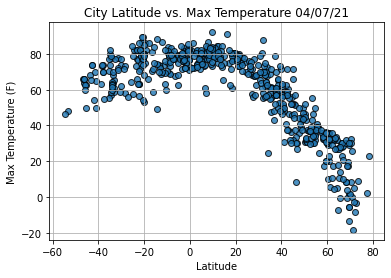

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

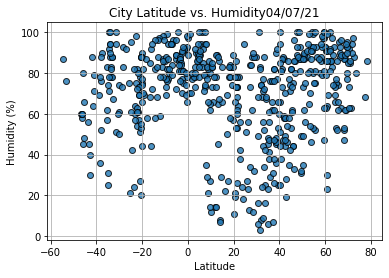

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

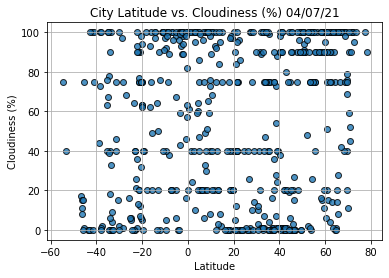

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

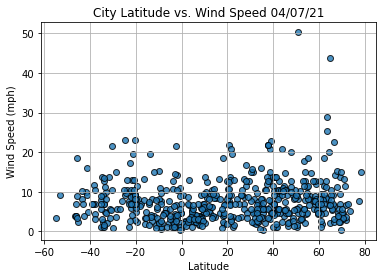

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()